# Exploratory Analysis

### Import Preliminaries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

test_df = pd.read_csv('Data/test.csv', low_memory=False,
                     parse_dates=['project_submitted_datetime'])
train_df = pd.read_csv('Data/train.csv', low_memory=False, 
                       parse_dates=['project_submitted_datetime'])

dfs = [test_df, train_df]

# Extending times features
for df in dfs:
    df['year'] = df['project_submitted_datetime'].dt.year.astype(int)
    df['month'] = df['project_submitted_datetime'].dt.month.astype(int)
    df['day'] = df['project_submitted_datetime'].dt.day.astype(int)
    df['hour'] = df['project_submitted_datetime'].dt.hour.astype(int)
    

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182080 entries, 0 to 182079
Data columns (total 20 columns):
id                                              182080 non-null object
teacher_id                                      182080 non-null object
teacher_prefix                                  182076 non-null object
school_state                                    182080 non-null object
project_submitted_datetime                      182080 non-null datetime64[ns]
project_grade_category                          182080 non-null object
project_subject_categories                      182080 non-null object
project_subject_subcategories                   182080 non-null object
project_title                                   182080 non-null object
project_essay_1                                 182080 non-null object
project_essay_2                                 182080 non-null object
project_essay_3                                 6374 non-null object
project_essay_4                

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78035 entries, 0 to 78034
Data columns (total 19 columns):
id                                              78035 non-null object
teacher_id                                      78035 non-null object
teacher_prefix                                  78034 non-null object
school_state                                    78035 non-null object
project_submitted_datetime                      78035 non-null datetime64[ns]
project_grade_category                          78035 non-null object
project_subject_categories                      78035 non-null object
project_subject_subcategories                   78035 non-null object
project_title                                   78035 non-null object
project_essay_1                                 78035 non-null object
project_essay_2                                 78035 non-null object
project_essay_3                                 2704 non-null object
project_essay_4                             

### View Sample Submissionm

In [4]:
sample = pd.read_csv('Data/sample_submission.csv')
sample.head(5)

,id,project_is_approved
0,p233245,0.847682
1,p096795,0.847682
2,p236235,0.847682
3,p233680,0.847682
4,p171879,0.847682


### View Testing Data

In [5]:
test_df.head(10)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,year,month,day,hour
0,p233245,5724a0c3ce11008366fff36dab4b943c,Ms.,CA,2016-04-27 13:45:41,Grades PreK-2,Music & The Arts,Visual Arts,Art Will Make You Happy!,My 2nd grade students are amazing! They are v...,My class is made up of 12 boys and 12 girls. ...,My second grade class will really benefit from...,The genorous donations to my project will make...,My students need a drying rack for their art p...,2,2016,4,27,13
1,p096795,445619941dc7cbe81c7be109dc61a56a,Mrs.,SC,2016-04-28 12:43:56,Grades 3-5,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Keeping up with the TIMEs,Students within the classroom work in small gr...,My students are all very talented young indivi...,"We do a lot of small group, where the student ...",This project is very important to my classroom...,My students need Time Magazines for next year ...,1,2016,4,28,12
2,p236235,e92a4902b1611a189643d6f12c51e6a0,Mrs.,SC,2016-04-29 21:16:05,Grades PreK-2,Math & Science,"Applied Sciences, Mathematics",Building Bridges to Problem Solving,My students share a love of learning. These s...,My class consists of 14 energetic learners. O...,These Fairy Tale Problem Solving STEM kits wil...,These materials will be help my students with ...,My students need to be mentally stimulated to ...,0,2016,4,29,21
3,p233680,8e92622d2985d3faac1de71609c4be72,Mrs.,IA,2016-04-27 22:32:43,Grades PreK-2,Literacy & Language,Literacy,Classroom Library,Reading is the gateway to the soul. Guiding c...,First graders enter the classroom each day rea...,Book bins will help to organize our classroom ...,"When students begin the first grade, many are ...",My students need an organized classroom library.,0,2016,4,27,22
4,p171879,91a3c89981f626d9a0d067c65fb186ce,Mr.,CA,2016-04-27 18:59:15,Grades 6-8,"Music & The Arts, Special Needs","Performing Arts, Special Needs",Reeds so we can Read,"\""Mr. Reyes! I need another reed!\"" I hear t...",We have a diverse population with almost entir...,Each day in my class students consume supplies...,My students come from very troubled homes and ...,My students need reeds to perform in class eac...,1,2016,4,27,18
5,p016071,3964746c32aa70b7161236d1eed9e98b,Ms.,CO,2016-04-28 17:21:52,Grades 3-5,Literacy & Language,Literacy,Classroom Library,A typical day in our classroom can be a little...,My students come from a variety of backgrounds...,The books that I am requesting came directly f...,This project will truly change the lives of my...,My students need books that are engaging and e...,2,2016,4,28,17
6,p099906,04dcdcf90807262e5cbe3a7a1435ca8b,Mrs.,GA,2016-04-29 08:12:53,Grades 6-8,Literacy & Language,"Literacy, Literature & Writing",A Tisket A Tasket A Set of Student Tablets,My students crave engaging texts with which th...,My students face many obstacles in their quest...,Having access to a class set of Kindle Fires w...,Donations to this project will open up a world...,My students need a class set of Kindle Fires s...,13,2016,4,29,8
7,p200236,d0f34635d41cf68d4d4a538194c88f4c,Mrs.,NV,2016-04-29 12:35:48,Grades PreK-2,"Literacy & Language, Music & The Arts","Literacy, Performing Arts",Literacy and Engineering,My students have to sit around a CD player to ...,My kindergarten students attend a school that ...,Our classroom needs a good listening center so...,When this project is fully funded it will bene...,My students need a listening center so they ca...,0,2016,4,29,12
8,p129452,f725cbd914b053fabc2c234e54b11828,Mrs.,AL,2016-04-29 13:52:41,Grades PreK-2,"Literacy & Language, Math & Science","Literature & Writing, Mathematics",Learning is Fun!,My students are new to school when they come t...,I teach 19 wonderful kids who want to learn to...,We need some 

### View Training Data

In [6]:
train_df.head(10)

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,year,month,day,hour
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1,2016,11,18,14
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0,2017,4,26,15
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1,2017,1,1,22
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0,2016,8,12,15
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1,2016,8,6,9
5,p063374,403c6783e9286e51ab318fba40f8d729,Mrs.,DE,2016-11-05 10:01:51,Grades PreK-2,"Applied Learning, Literacy & Language","Character Education, Literature & Writing",Need to Reach Our Virtual Mentors!!!,My kids tell me each day that they want to mak...,I started a program called Telementoring in ho...,NaN,NaN,My students need tablets in order to communic...,0,1,2016,11,5,10
6,p103285,4e156c5fb3eea2531601c8736f3751a7,Mrs.,MO,2016-08-31 00:30:43,Grades PreK-2,Health & Sports,Health & Wellness,Active Kindergartners,Kindergarten is the new first grade. My studen...,With balance discs and stools as flexible seat...,NaN,NaN,My students need stability stools and inflatab...,1,1,2016,8,31,0
7,p181781,c71f2ef13b4bc91afac61ca8fd4c0f9f,Mrs.,SC,2016-08-03 13:26:01,Grades PreK-2,"Applied Learning, Literacy & Language","Early Development, Literature & Writing",Fabulous Firsties-Wiggling to Learn!,First graders are fantastic! They are excited ...,First graders love learning! We need 6 wiggle-...,NaN,NaN,My students need wiggle stools to allow them t...,0,1,2016,8,3,13
8,p114989,b580c11b1497a0a67317763b7f03eb27,Ms.,IN,2016-09-13 22:35:57,Grades 6-8,Math & Science,Mathematics,Wobble Chairs Help Fidgety Kids Focus,My seventh graders dream big. They can't wait ...,I have used alternative seating in my classroo...,NaN,NaN,My students need seating that allows the most ...,13,1,2016,9,13,22
9,p191410,2071fb0af994f8f16e7c6ed0f35062a1,Mrs.,IL,2016-09-24 18:38:59,Grades PreK-2,Literacy & Language,Literacy,Snuggle Up With A Good Book,I teach first grade in a small farming town in...,There is nothing better than snuggling up with...,NaN,NaN,My students need 2 youth sized reclining chair...,12,1,2016,9,24,18


### Training Features

In [7]:
train_df.columns

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'year', 'month', 'day', 'hour'],
      dtype='object')

### Checking Null Values

In [8]:
train_df.isnull().sum()

id                                                   0
teacher_id                                           0
teacher_prefix                                       4
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 175706
project_essay_4                                 175706
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
year                                                 0
month                                                0
day       

In [9]:
test_df.isnull().sum()

id                                                  0
teacher_id                                          0
teacher_prefix                                      1
school_state                                        0
project_submitted_datetime                          0
project_grade_category                              0
project_subject_categories                          0
project_subject_subcategories                       0
project_title                                       0
project_essay_1                                     0
project_essay_2                                     0
project_essay_3                                 75331
project_essay_4                                 75331
project_resource_summary                            0
teacher_number_of_previously_posted_projects        0
year                                                0
month                                               0
day                                                 0
hour                        

### Data Shape

In [10]:
train_df.shape

(182080, 20)

In [11]:
test_df.shape

(78035, 19)

### Approval Rate

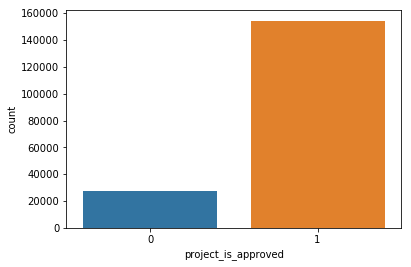

In [12]:
sns.countplot(train_df.project_is_approved)

### Datetime Ranges 

In [13]:
train_df.year.value_counts()

2016    131473
2017     50607
Name: year, dtype: int64

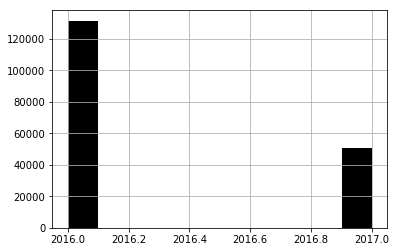

In [14]:
train_df.year.hist(color='black')

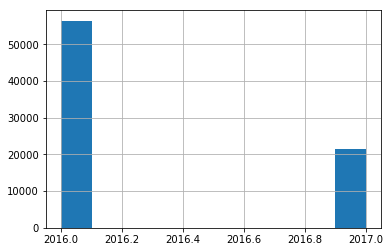

In [15]:
test_df.year.hist()

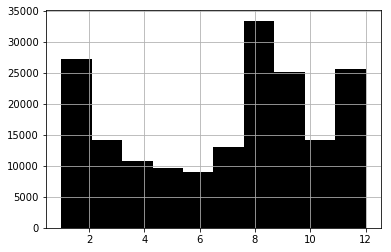

In [16]:
train_df.month.hist(color='black')

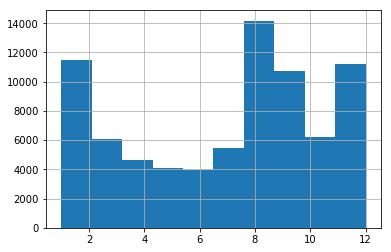

In [17]:
test_df.month.hist()

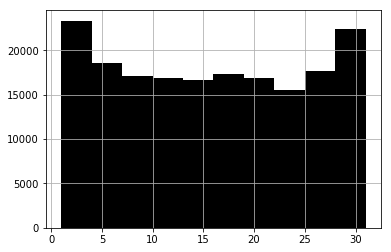

In [18]:
train_df.day.hist(color='black')

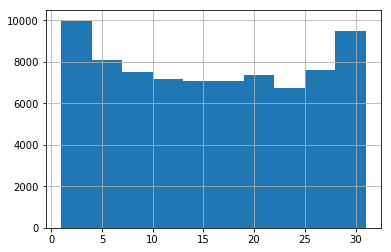

In [19]:
test_df.day.hist()

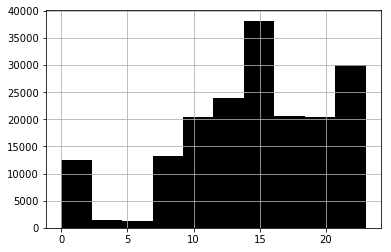

In [20]:
train_df.hour.hist(color='black')

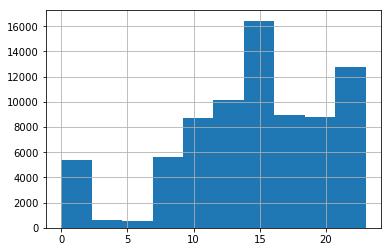

In [21]:
test_df.hour.hist()

### Previously Posted Project

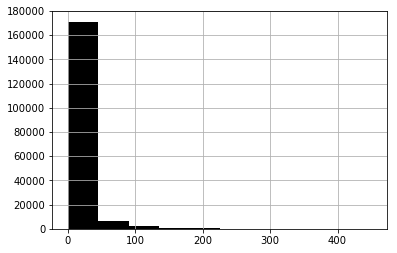

In [22]:
train_df.teacher_number_of_previously_posted_projects.hist(
    color='black')

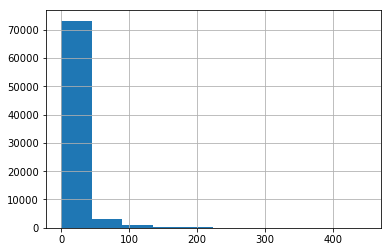

In [23]:
test_df.teacher_number_of_previously_posted_projects.hist()

### Viewing Essay Title Sample

In [24]:
train_df.project_title.sample(1).values

array(['Get The Wiggles Out & Focus'], dtype=object)

### Viewing Essay 1 Sample

In [25]:
train_df.project_essay_1.sample(1).values

array([ "My students are awesome! Our school is between Troost and Holmes, a dividing line in our city in terms of socio-economics. Most of our students come from the East side of Troost, where economic disparities can definitely be found. However, many of them don't allow this to affect them in any way. Some of them come from more challenging circumstances than others, but all of them work hard every day to be their best. For that reason, I try my best to provide them with enriching learning experiences to foster not only a love for learning, but an unending quest for scholarship!"], dtype=object)

### Viewing Essay 2 Sample

In [26]:
train_df.project_essay_2.sample(1).values

array([ 'Having a set of iPads with Osmo learning centers will allow for different structures of learning in my classroom. With these centers, students will be able to learn letters and letter sounds as well as create words with real life pictures. These centers will also help students with number recognition, counting, addition and subtraction. There is no limit to the kindergarten skills that can be taught with this technology. \\r\\nIn a world driven by technology, our students should have many good opportunities to use it and learn from each day. These iPad learning centers will allow our kindergarten students to work independently as well as together as they take turns playing educational games. The possibilities of lessons we can create for our students are endless with this technology!'], dtype=object)

### Viewing Essay 3 Sample

In [27]:
train_df.project_essay_3 = train_df.project_essay_3.fillna(value='No Essay')
train_df.project_essay_3.sample(1).values

array(['No Essay'], dtype=object)

### Viewing Essay 4 Sample

In [28]:
train_df.project_essay_4 = train_df.project_essay_4.fillna(value='No Essay')
train_df.project_essay_4.sample(1).values

array(['No Essay'], dtype=object)

### Viewing Resource Sample

In [29]:
train_df.project_resource_summary.sample(1).values

array([ 'My students need tablets in our classroom to help support use of 21st century skills and to use innovative ways for building reading proficiency!'], dtype=object)

### Project Categories 

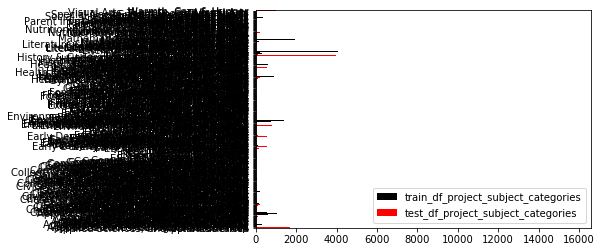

In [67]:
train_pc = pd.DataFrame(train_df.project_subject_categories.value_counts())
test_psc = pd.DataFrame(test_df.project_subject_categories.value_counts())
pc = pd.concat([train_psc, test_psc], axis=1)
psc.columns= ['train_df_project_subject_categories',
              'test_df_project_subject_categories']
pc = psc.sort_index()
pc.plot.barh(color=['black','red'])

### Project Sub Caterogies

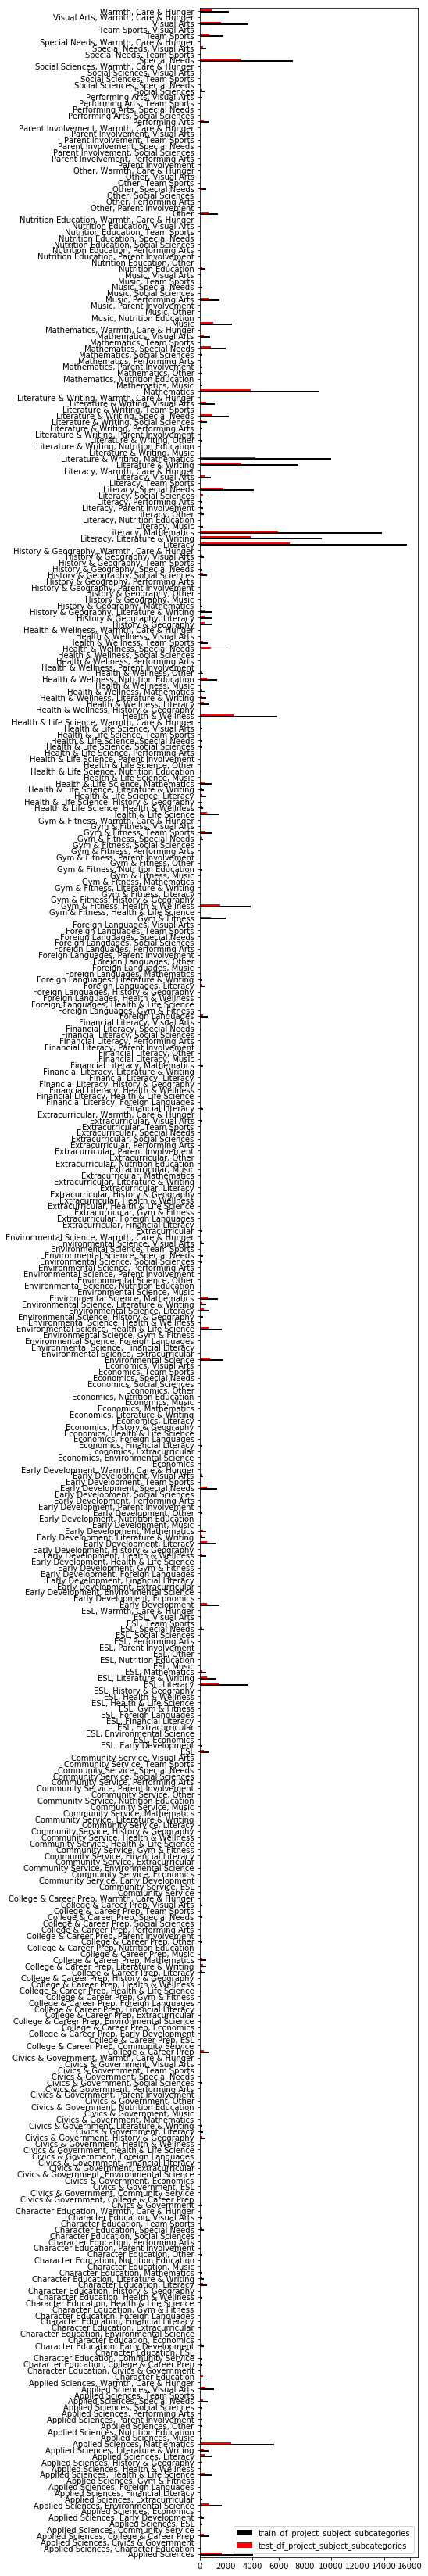

In [66]:
train_psc = pd.DataFrame(train_df.project_subject_subcategories.value_counts())
test_psc = pd.DataFrame(test_df.project_subject_subcategories.value_counts())
psc = pd.concat([train_psc, test_psc], axis=1)
psc.columns= ['train_df_project_subject_subcategories',
              'test_df_project_subject_subcategories']
psc = psc.sort_index()
psc.plot.barh(color=['black','red'], figsize=(5,60))

### Grade Level

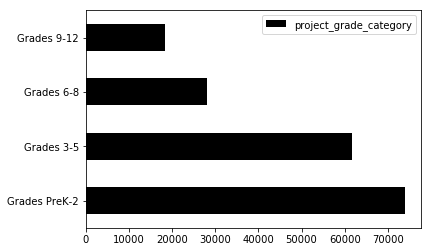

In [53]:
gc = pd.DataFrame(train_df.project_grade_category.value_counts())
gc.plot.barh(color='black')

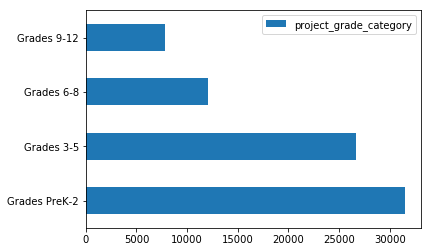

In [68]:
gc = pd.DataFrame(test_df.project_grade_category.value_counts())
gc.plot.barh()

### School State

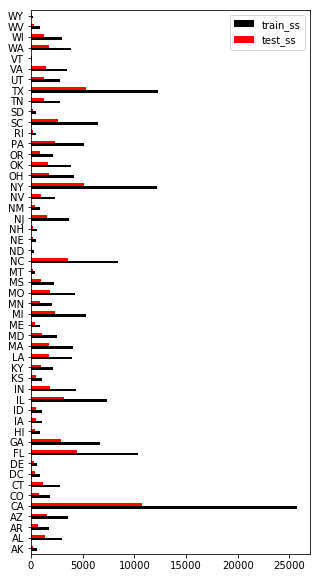

In [74]:
train_ss = pd.DataFrame(train_df.school_state.value_counts())
test_ss = pd.DataFrame(test_df.school_state.value_counts())
ss = pd.concat([train_ss, test_ss], axis=1)
ss.columns = ['train_ss','test_ss']
ss.plot.barh(color=['black','red'], figsize=(5,10))

### Teacher Prefix

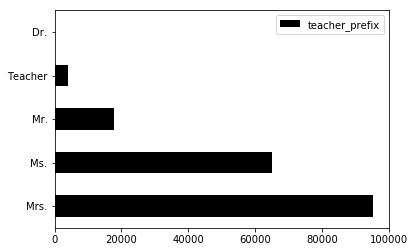

In [83]:
tp = pd.DataFrame(train_df.teacher_prefix.value_counts())
tp.plot.barh(color=['black'])

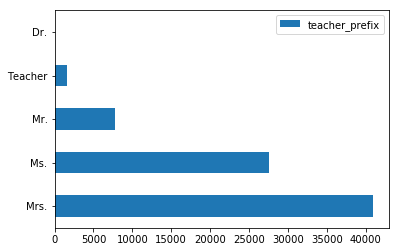

In [84]:
tp = pd.DataFrame(test_df.teacher_prefix.value_counts())
tp.plot.barh()

### Teachers

In [93]:
print('train_df teacher records:',len(train_df.teacher_id))
print('test_df teacher records:',len(test_df.teacher_id))
print()
print('train_df unique teacher records:',len(train_df.teacher_id.unique()))
print('test_df unique teacher records:',len(test_df.teacher_id.unique()))

train_df teacher records: 182080
test_df teacher records: 78035

train_df unique teacher records: 104414
test_df unique teacher records: 55508


In [103]:
teachers = pd.DataFrame(train_df.teacher_id.value_counts())
tearhers_g2= teachers[teachers.teacher_id > 1]
print('Teachers that submitted twice:',len(tearhers_g2))

tearhers_g10= teachers[teachers.teacher_id > 10]
print('Teachers that submitted more than 10 times:',len(tearhers_g10))

tearhers_g50= teachers[teachers.teacher_id > 50]
print('Teachers that submitted more than 50 times:',len(tearhers_g50))

Teachers that submitted twice: 32256
Teachers that submitted more than 10 times: 1111
Teachers that submitted more than 50 times: 5


In [105]:
teachers = pd.DataFrame(test_df.teacher_id.value_counts())
tearhers_g2= teachers[teachers.teacher_id > 1]
print('Teachers that submitted twice:',len(tearhers_g2))

tearhers_g10= teachers[teachers.teacher_id > 10]
print('Teachers that submitted more than 10 times:',len(tearhers_g10))

tearhers_g50= teachers[teachers.teacher_id > 50]
print('Teachers that submitted more than 50 times:',len(tearhers_g50))

Teachers that submitted twice: 11727
Teachers that submitted more than 10 times: 152
Teachers that submitted more than 50 times: 0


### Project Essay

It seems applicatiosn used to use 4 essays for their application until 2016-05-17 10:00:51. After this date, applications only used 2 essay questions.

In [122]:
p34 = train_df[['project_essay_3', 'project_essay_4', 'project_submitted_datetime']]
p34 = p34.sort_values(['project_submitted_datetime'], ascending=False)
p34 = p34.reset_index()
p34.head()

,index,project_essay_3,project_essay_4,project_submitted_datetime
0,75577,No Essay,No Essay,2017-04-30 23:50:43
1,124250,No Essay,No Essay,2017-04-30 23:45:08
2,114576,No Essay,No Essay,2017-04-30 23:32:23
3,13791,No Essay,No Essay,2017-04-30 23:27:07
4,179833,No Essay,No Essay,2017-04-30 23:25:42


In [123]:
p34.tail()

,index,project_essay_3,project_essay_4,project_submitted_datetime
182075,8393,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,2016-04-27 00:27:36
182076,180523,My language arts and math program is designed ...,Incorporating technology in the classroom is a...,2016-04-27 00:20:33
182077,7344,The materials I am requesting will help studen...,Donations to this project will improve my clas...,2016-04-27 00:15:39
182078,173035,"This time, I am asking to improve three differ...",This project will have a huge impact on my stu...,2016-04-27 00:04:09
182079,128730,The student will use the Sparki Robots to lear...,The Sparki robots would add a motivation for t...,2016-04-27 00:03:38


In [124]:
p34[p34.project_essay_3 != 'No Essay'].head(1)

,index,project_essay_3,project_essay_4,project_submitted_datetime
175706,66153,"I am asking for a river aquarium with animals,...",This aquarium and terrarium will have a huge i...,2016-05-17 09:38:09


In [125]:
p34[p34.project_essay_4 != 'No Essay'].head(1)

,index,project_essay_3,project_essay_4,project_submitted_datetime
175706,66153,"I am asking for a river aquarium with animals,...",This aquarium and terrarium will have a huge i...,2016-05-17 09:38:09


In [127]:
p34[p34.project_essay_4 == 'No Essay'].tail(1)

,index,project_essay_3,project_essay_4,project_submitted_datetime
175705,18260,No Essay,No Essay,2016-05-17 10:00:51


In [130]:
p34[p34.project_essay_3 != 'No Essay'].tail(1)

,index,project_essay_3,project_essay_4,project_submitted_datetime
182079,128730,The student will use the Sparki Robots to lear...,The Sparki robots would add a motivation for t...,2016-04-27 00:03:38


In [129]:
p34[p34.project_essay_3 != 'No Essay'].head(20)

,index,project_essay_3,project_essay_4,project_submitted_datetime
175706,66153,"I am asking for a river aquarium with animals,...",This aquarium and terrarium will have a huge i...,2016-05-17 09:38:09
175707,165972,Having these graphing calculators will improve...,Having to spend less time on homework or at sc...,2016-05-17 09:37:49
175708,31911,"In my English classes, written communication i...",This type of communication- via electronic dev...,2016-05-17 09:12:57
175709,133343,Each student will get a workbook. When I leav...,I am 37 weeks pregnant and I am responsible fo...,2016-05-17 09:10:46
175710,51107,"The students will use the soccer balls, footba...","With the soccer balls, footballs, and basketba...",2016-05-17 09:09:52
175711,72262,These book cases will give us more space for o...,"By donating to our project, you will help give...",2016-05-17 09:07:59
175712,80774,My students will use a variety of apps to list...,Using technology for independent practice will...,2016-05-17 09:04:54
175713,179572,We take eating and feeding ourselves for grant...,Adaptive feeding tools are important to teach ...,2016-05-17 08:59:45
175714,49723,Children with autism often need a specialized ...,My students deserve an appropriate education t...,2016-05-17 08:57:49
175715,135471,I currently have 4 standing desks in my class ...,This donation would greatly help my students. ...,2016-05-17 08:54:17


Author: Kavi Sekhon